In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import dataset

In [2]:
dataset = pd.read_csv('Iris.csv')

In [3]:
dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


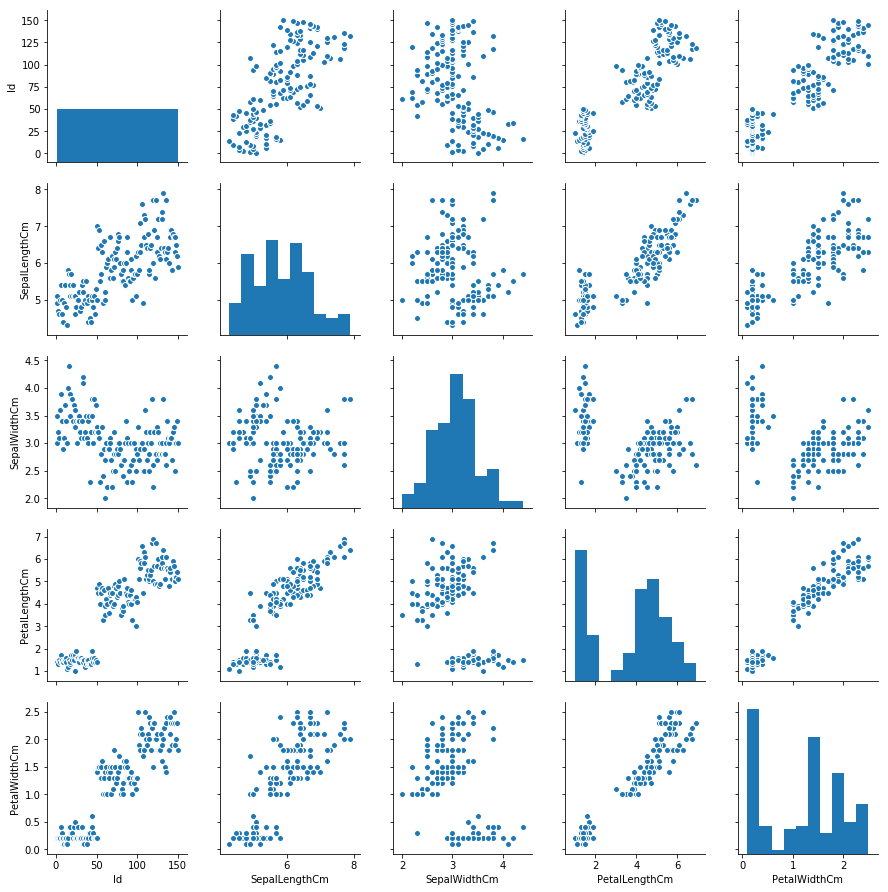

In [4]:
import seaborn as sns
%matplotlib inline
sns.pairplot(dataset)

In [5]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


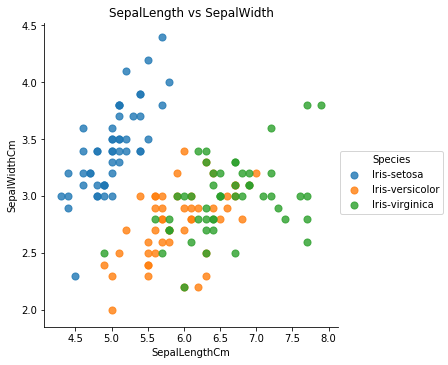

In [7]:
sns.lmplot('SepalLengthCm', 'SepalWidthCm',data=dataset,fit_reg=False,hue="Species",
scatter_kws={"marker": "D","s": 50})
plt.title('SepalLength vs SepalWidth')

In [8]:
dataset.loc[dataset["Species"]=="Iris-setosa","Species"]=0
dataset.loc[dataset["Species"]=="Iris-versicolor","Species"]=1
dataset.loc[dataset["Species"]=="Iris-virginica","Species"]=2

In [9]:
print(dataset.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
0   1            5.1           3.5            1.4           0.2       0
1   2            4.9           3.0            1.4           0.2       0
2   3            4.7           3.2            1.3           0.2       0
3   4            4.6           3.1            1.5           0.2       0
4   5            5.0           3.6            1.4           0.2       0


In [10]:
X = dataset.iloc[:, 1:5].values

In [11]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [12]:
y = dataset.iloc[:, 5].values

In [13]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

In [14]:
y.shape

(150,)

In [15]:
from sklearn.preprocessing import normalize
X=normalize(X,axis=0)
print("Examples of X_normalised\n",X[:3])

Examples of X_normalised
 [[0.07056264 0.09265065 0.02754646 0.01150299]
 [0.06779548 0.07941484 0.02754646 0.01150299]
 [0.06502832 0.08470916 0.02557886 0.01150299]]


In [16]:
X.shape

(150, 4)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
y_train.shape

(120,)

In [23]:
X_train[:10]

array([[0.0885492 , 0.082062  , 0.10821824, 0.10352695],
       [0.07471338, 0.07941484, 0.0885422 , 0.08627246],
       [0.07194622, 0.09265065, 0.02951407, 0.01150299],
       [0.08439845, 0.07941484, 0.09641262, 0.10352695],
       [0.0885492 , 0.07412052, 0.11018585, 0.12653294],
       [0.07194622, 0.07147336, 0.07673657, 0.08052096],
       [0.07886413, 0.10059213, 0.03344928, 0.01725449],
       [0.08301487, 0.07147336, 0.10034783, 0.09202396],
       [0.08163129, 0.07941484, 0.08263939, 0.08627246],
       [0.08024771, 0.06882619, 0.07870418, 0.06901797]])

In [24]:
y_train[:10]

array([2, 1, 0, 2, 2, 1, 0, 1, 1, 1], dtype=object)

In [25]:
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils

C:\Users\88016\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [26]:
y_train=np_utils.to_categorical(y_train,num_classes=3)
y_test=np_utils.to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (120, 3)
Shape of y_test (30, 3)


In [29]:
y_train[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [240]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [241]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,verbose=1)

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 1s 6ms/step - loss: 1.0528 - acc: 0.6500 - val_loss: 1.0165 - val_acc: 0.5667
Epoch 2/100
120/120 [==============================] - 0s 3ms/step - loss: 0.8282 - acc: 0.7000 - val_loss: 0.7153 - val_acc: 0.6000
Epoch 3/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5042 - acc: 0.8667 - val_loss: 0.5286 - val_acc: 0.6000
Epoch 4/100
120/120 [==============================] - 0s 3ms/step - loss: 0.3223 - acc: 0.8500 - val_loss: 0.2177 - val_acc: 0.9667
Epoch 5/100
120/120 [==============================] - 0s 3ms/step - loss: 0.2330 - acc: 0.9083 - val_loss: 0.1481 - val_acc: 0.9667
Epoch 6/100
120/120 [==============================] - 0s 2ms/step - loss: 0.1575 - acc: 0.9667 - val_loss: 0.1949 - val_acc: 0.9667
Epoch 7/100
120/120 [==============================] - 0s 2ms/step - loss: 0.1235 - acc: 0.9667 - val_loss: 0.1300 - val_acc: 0.9333
Epoch 8/100
120/120 [===

Epoch 62/100
120/120 [==============================] - 0s 2ms/step - loss: 0.0953 - acc: 0.9500 - val_loss: 0.0585 - val_acc: 0.9667
Epoch 63/100
120/120 [==============================] - 0s 2ms/step - loss: 0.1100 - acc: 0.9417 - val_loss: 0.0489 - val_acc: 1.0000
Epoch 64/100
120/120 [==============================] - 0s 2ms/step - loss: 0.0744 - acc: 0.9667 - val_loss: 0.0453 - val_acc: 1.0000
Epoch 65/100
120/120 [==============================] - 0s 2ms/step - loss: 0.0882 - acc: 0.9583 - val_loss: 0.0542 - val_acc: 1.0000
Epoch 66/100
120/120 [==============================] - 0s 2ms/step - loss: 0.0792 - acc: 0.9667 - val_loss: 0.0578 - val_acc: 0.9667
Epoch 67/100
120/120 [==============================] - 0s 2ms/step - loss: 0.0756 - acc: 0.9583 - val_loss: 0.0388 - val_acc: 1.0000
Epoch 68/100
120/120 [==============================] - 0s 2ms/step - loss: 0.0821 - acc: 0.9417 - val_loss: 0.1357 - val_acc: 0.9333
Epoch 69/100
120/120 [==============================] - 0s 2ms

In [242]:
pred = classifier.predict(X_test)
print(pred[:20])

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [243]:
scores = model.evaluate(X_test, y_test)
print((model.metrics_names[1], scores[1]*100))

30/30 [==============================] - 0s 100us/step
('acc', 100.0)
